# K-means Clustering


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df = pd.read_csv("combined_water_quality_pipeline_data.csv")

df = df.dropna(subset=["Target"])
df["Target"] = df["Target"].astype(int)

y = df["Target"]
X = df.drop(columns=["Target"])


cat_cols = X.select_dtypes(include=["object"]).columns
encoders = {c: LabelEncoder().fit(X[c].astype(str)) for c in cat_cols}
for c, le in encoders.items():
    X[c] = le.transform(X[c].astype(str))


num_cols = X.select_dtypes(include=[np.number]).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


k = 3
km = KMeans(n_clusters=k, n_init=10, random_state=42)
cluster_ids = km.fit_predict(X_scaled)


cluster_to_class = {}
for c in range(k):
    mask = cluster_ids == c
    majority_class = y[mask].mode()[0]       #most frequent Target in that cluster
    cluster_to_class[c] = majority_class

y_pred = pd.Series(cluster_ids).map(cluster_to_class).values


acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)               #sensitivity
f1   = f1_score(y, y_pred)

tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
spec = tn / (tn + fp)                        #specificity

print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall (Sens.) : {rec:.4f}")
print(f"Specificity    : {spec:.4f}")
print(f"F1‑score       : {f1:.4f}")


Accuracy       : 0.7924
Precision      : 0.7460
Recall (Sens.) : 0.4750
Specificity    : 0.9299
F1‑score       : 0.5804


📊 Evaluation Metrics
Adjusted Rand Index     : 0.3717
Silhouette Score        : 0.1310
Accuracy                : 0.8128
Precision               : 0.7085
Recall                  : 0.6472
F1 Score                : 0.6764
Confusion Matrix:
[[491398  64107]
 [ 84934 155800]]


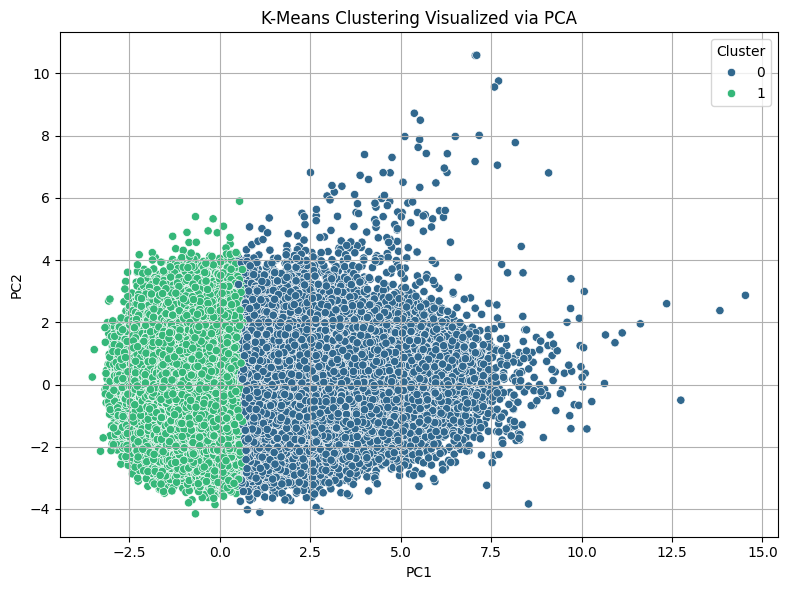

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score, silhouette_score, accuracy_score,
    precision_score, recall_score, f1_score, confusion_matrix
)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode


df = pd.read_csv('combined_water_quality_pipeline_data.csv')  # Replace with actual CSV file path

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()


num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


X = df.drop(columns=['Target'])
y = df['Target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters


def map_clusters_to_labels(clusters, true_labels):
    labels = np.zeros_like(clusters)
    for i in np.unique(clusters):
        mask = clusters == i
        labels[mask] = mode(true_labels[mask])[0]
    return labels

pseudo_labels = map_clusters_to_labels(clusters, y)


ari = adjusted_rand_score(y, clusters)
sil_score = silhouette_score(X_scaled, clusters)
acc = accuracy_score(y, pseudo_labels)
prec = precision_score(y, pseudo_labels)
rec = recall_score(y, pseudo_labels)
f1 = f1_score(y, pseudo_labels)
conf_matrix = confusion_matrix(y, pseudo_labels)


print("📊 Evaluation Metrics")
print(f"Adjusted Rand Index     : {ari:.4f}")
print(f"Silhouette Score        : {sil_score:.4f}")
print(f"Accuracy                : {acc:.4f}")
print(f"Precision               : {prec:.4f}")
print(f"Recall                  : {rec:.4f}")
print(f"F1 Score                : {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# -------------------------
# 7. Optional: PCA Plot
# -------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering Visualized via PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


# K-means Clustering with City-wise clusters


🏙️ City: Alameda
ARI        : 0.3784
Silhouette : 0.1364
Accuracy   : 0.8152
Precision  : 0.7189
Recall     : 0.6485
F1 Score   : 0.6819
Confusion Matrix:
 [[24653  3095]
 [ 4290  7916]]


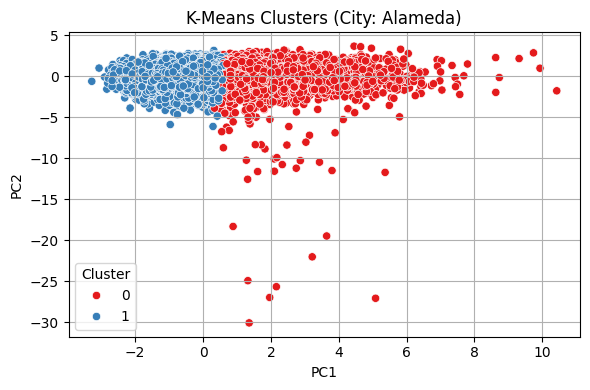


🏙️ City: Berkeley
ARI        : 0.3720
Silhouette : 0.1386
Accuracy   : 0.8134
Precision  : 0.7113
Recall     : 0.6394
F1 Score   : 0.6735
Confusion Matrix:
 [[24873  3127]
 [ 4345  7706]]


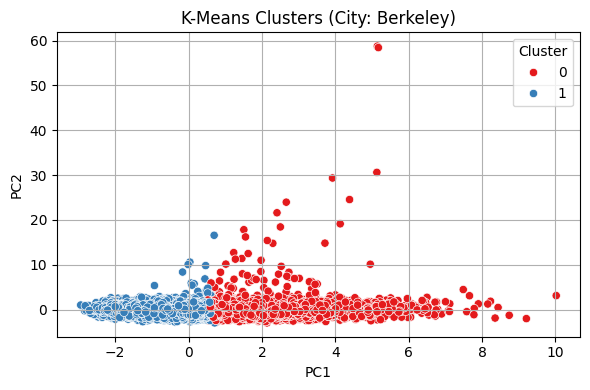


🏙️ City: Concord
ARI        : 0.3609
Silhouette : 0.1360
Accuracy   : 0.8086
Precision  : 0.6998
Recall     : 0.6414
F1 Score   : 0.6694
Confusion Matrix:
 [[24532  3317]
 [ 4322  7732]]


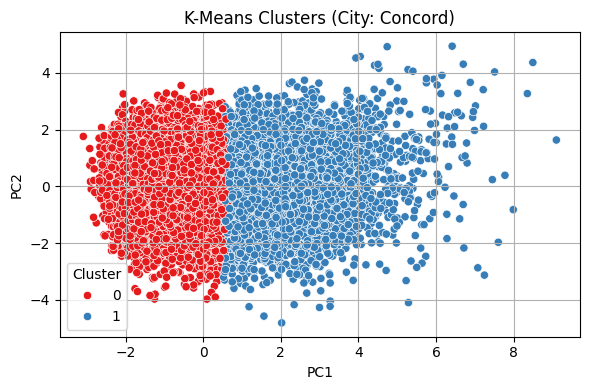


🏙️ City: Fremont
ARI        : 0.3813
Silhouette : 0.1340
Accuracy   : 0.8163
Precision  : 0.7088
Recall     : 0.6615
F1 Score   : 0.6843
Confusion Matrix:
 [[24584  3260]
 [ 4060  7935]]


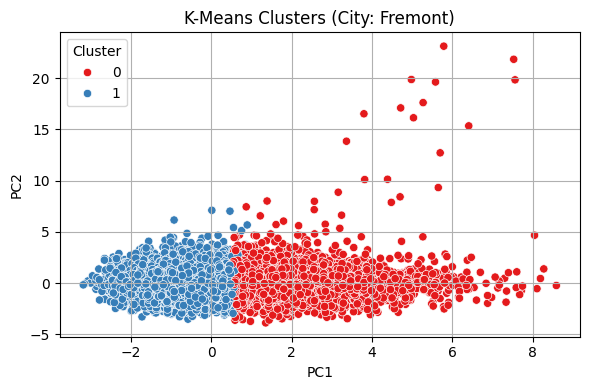


🏙️ City: Hayward
ARI        : 0.3780
Silhouette : 0.1312
Accuracy   : 0.8146
Precision  : 0.7086
Recall     : 0.6620
F1 Score   : 0.6845
Confusion Matrix:
 [[24442  3295]
 [ 4091  8013]]


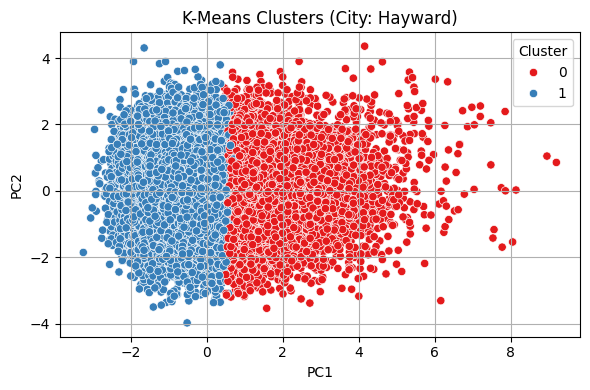


🏙️ City: Menlo Park
ARI        : 0.3660
Silhouette : 0.1382
Accuracy   : 0.8110
Precision  : 0.7114
Recall     : 0.6337
F1 Score   : 0.6703
Confusion Matrix:
 [[24452  3081]
 [ 4389  7593]]


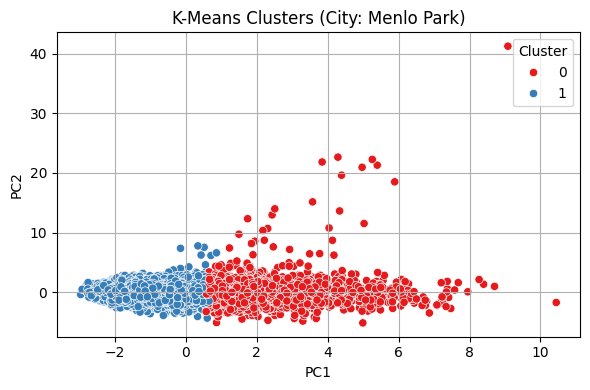


🏙️ City: Mill Valley
ARI        : 0.3637
Silhouette : 0.1352
Accuracy   : 0.8093
Precision  : 0.7043
Recall     : 0.6450
F1 Score   : 0.6733
Confusion Matrix:
 [[24425  3289]
 [ 4311  7832]]


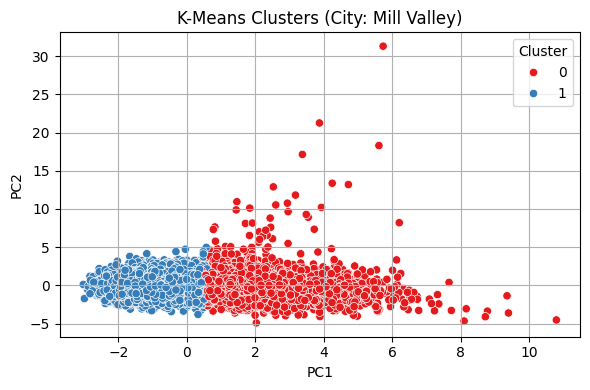


🏙️ City: Mountain View
ARI        : 0.3740
Silhouette : 0.1406
Accuracy   : 0.8144
Precision  : 0.7133
Recall     : 0.6385
F1 Score   : 0.6739
Confusion Matrix:
 [[24943  3087]
 [ 4349  7682]]


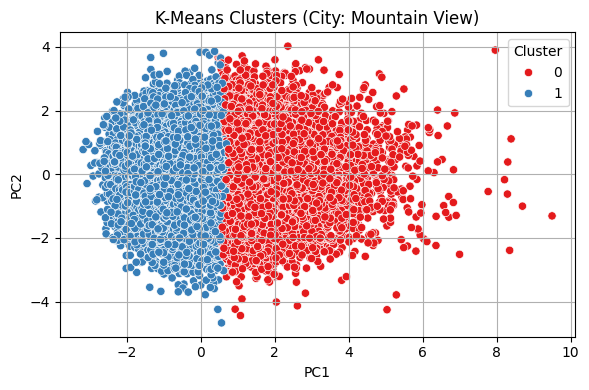


🏙️ City: Novato
ARI        : 0.3744
Silhouette : 0.1336
Accuracy   : 0.8135
Precision  : 0.7065
Recall     : 0.6566
F1 Score   : 0.6806
Confusion Matrix:
 [[24433  3283]
 [ 4132  7902]]


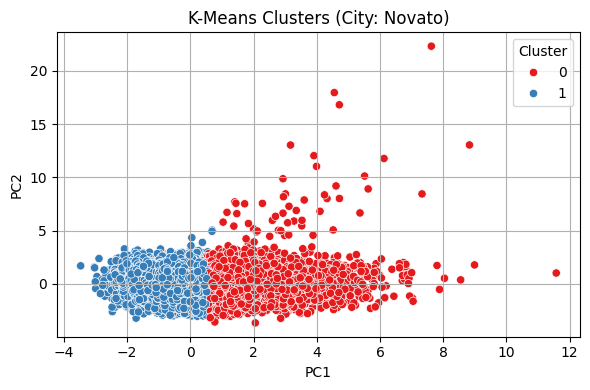


🏙️ City: Oakland
ARI        : 0.3741
Silhouette : 0.1358
Accuracy   : 0.8136
Precision  : 0.7107
Recall     : 0.6495
F1 Score   : 0.6787
Confusion Matrix:
 [[24760  3218]
 [ 4265  7904]]


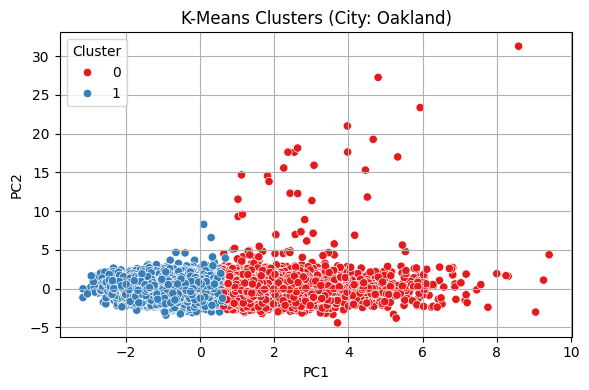


🏙️ City: Palo Alto
ARI        : 0.3662
Silhouette : 0.1333
Accuracy   : 0.8100
Precision  : 0.7013
Recall     : 0.6536
F1 Score   : 0.6766
Confusion Matrix:
 [[24221  3354]
 [ 4172  7873]]


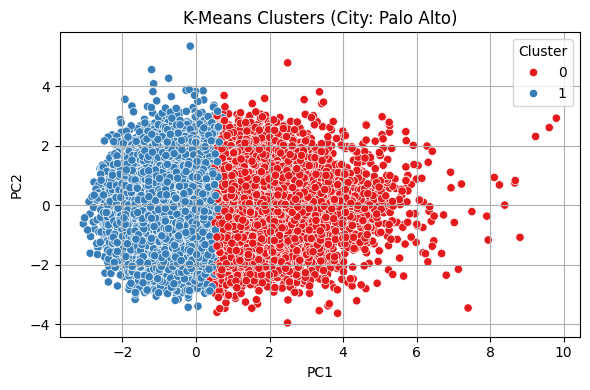


🏙️ City: Redwood City
ARI        : 0.3778
Silhouette : 0.1379
Accuracy   : 0.8154
Precision  : 0.7129
Recall     : 0.6483
F1 Score   : 0.6791
Confusion Matrix:
 [[24645  3126]
 [ 4212  7764]]


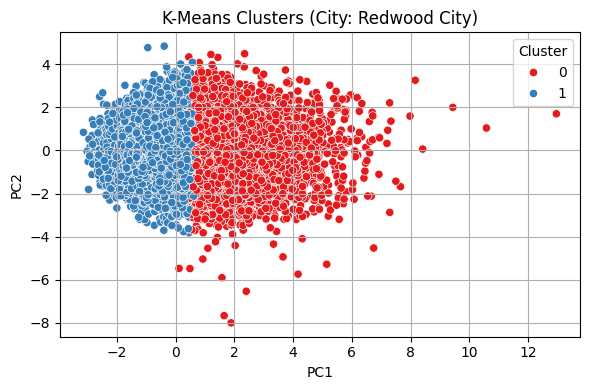


🏙️ City: Richmond
ARI        : 0.3669
Silhouette : 0.1394
Accuracy   : 0.8114
Precision  : 0.7042
Recall     : 0.6397
F1 Score   : 0.6704
Confusion Matrix:
 [[24627  3202]
 [ 4293  7623]]


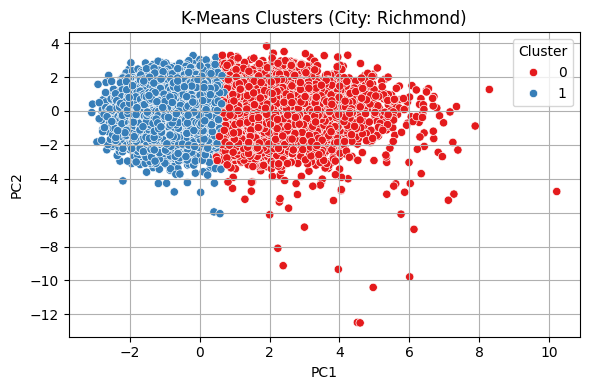


🏙️ City: San Francisco
ARI        : 0.3730
Silhouette : 0.1356
Accuracy   : 0.8134
Precision  : 0.7029
Recall     : 0.6531
F1 Score   : 0.6771
Confusion Matrix:
 [[24548  3286]
 [ 4131  7776]]


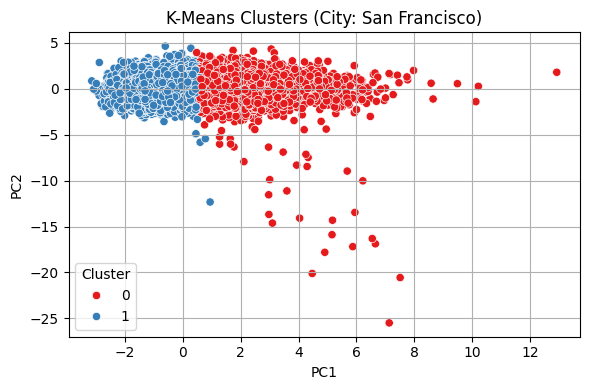


🏙️ City: San Jose
ARI        : 0.3620
Silhouette : 0.1365
Accuracy   : 0.8089
Precision  : 0.7077
Recall     : 0.6367
F1 Score   : 0.6703
Confusion Matrix:
 [[24352  3179]
 [ 4390  7695]]


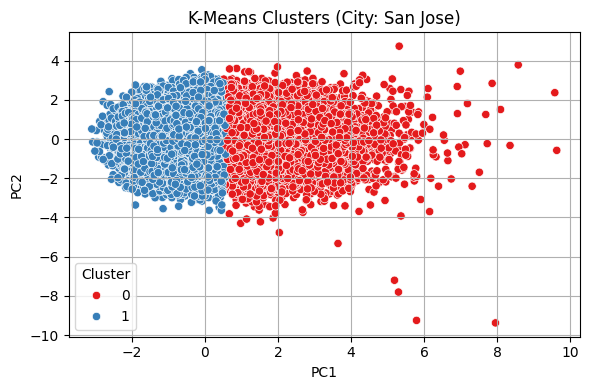


🏙️ City: San Mateo
ARI        : 0.3681
Silhouette : 0.1379
Accuracy   : 0.8118
Precision  : 0.7083
Recall     : 0.6389
F1 Score   : 0.6718
Confusion Matrix:
 [[24688  3163]
 [ 4341  7679]]


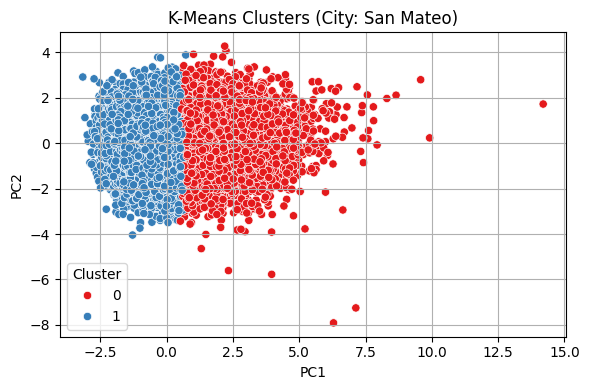


🏙️ City: Santa Clara
ARI        : 0.3714
Silhouette : 0.1338
Accuracy   : 0.8125
Precision  : 0.7068
Recall     : 0.6499
F1 Score   : 0.6771
Confusion Matrix:
 [[24231  3208]
 [ 4167  7734]]


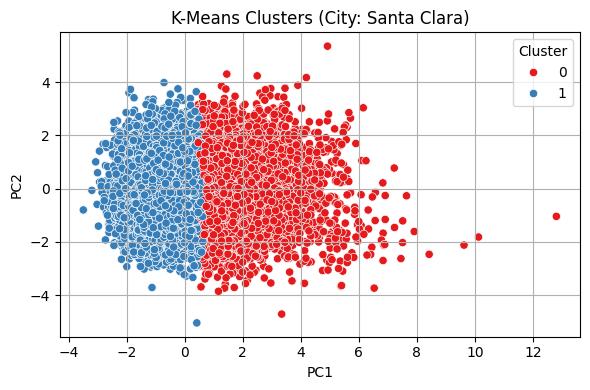


🏙️ City: South San Francisco
ARI        : 0.3782
Silhouette : 0.1346
Accuracy   : 0.8147
Precision  : 0.7164
Recall     : 0.6550
F1 Score   : 0.6843
Confusion Matrix:
 [[24515  3175]
 [ 4224  8019]]


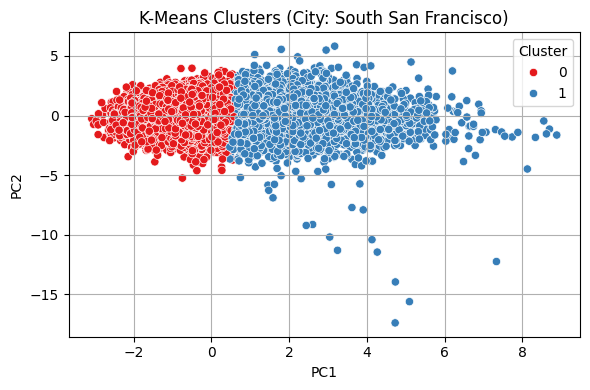


🏙️ City: Sunnyvale
ARI        : 0.3694
Silhouette : 0.1355
Accuracy   : 0.8116
Precision  : 0.7061
Recall     : 0.6503
F1 Score   : 0.6771
Confusion Matrix:
 [[24481  3278]
 [ 4235  7877]]


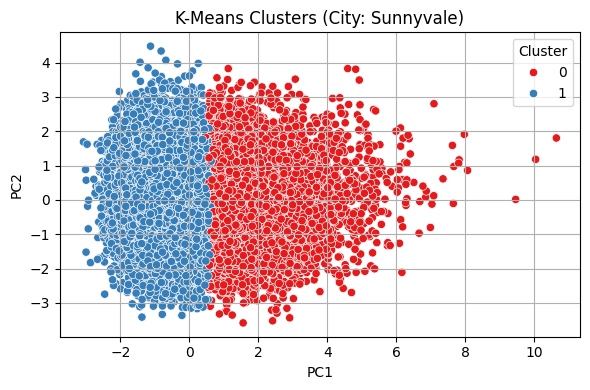


🏙️ City: Walnut Creek
ARI        : 0.3729
Silhouette : 0.1394
Accuracy   : 0.8143
Precision  : 0.7023
Recall     : 0.6436
F1 Score   : 0.6717
Confusion Matrix:
 [[24869  3208]
 [ 4191  7569]]


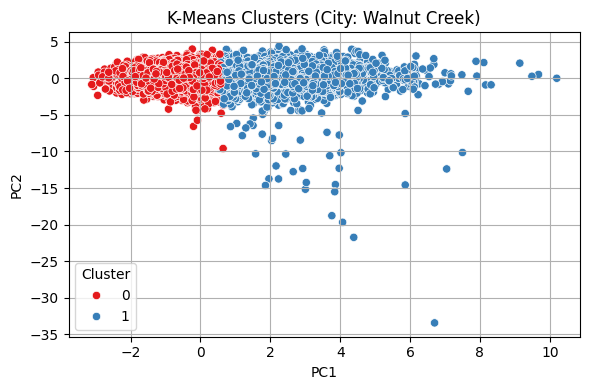


📊 Summary of Clustering Metrics per City:
                   City       ARI  Silhouette  Accuracy  Precision    Recall  \
4               Hayward  0.378014    0.131222  0.814613   0.708613  0.662013   
3               Fremont  0.381288    0.133965  0.816260   0.708799  0.661526   
17  South San Francisco  0.378210    0.134585  0.814715   0.716366  0.654987   
0               Alameda  0.378350    0.136405  0.815162   0.718917  0.648534   
8                Novato  0.374401    0.133582  0.813459   0.706482  0.656640   
11         Redwood City  0.377775    0.137948  0.815382   0.712948  0.648297   
9               Oakland  0.374094    0.135789  0.813610   0.710664  0.649519   
16          Santa Clara  0.371386    0.133760  0.812532   0.706818  0.649861   
18            Sunnyvale  0.369447    0.135512  0.811567   0.706141  0.650347   
13        San Francisco  0.372994    0.135625  0.813367   0.702947  0.653061   
10            Palo Alto  0.366222    0.133280  0.810045   0.701256  0.653632 

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score, silhouette_score, accuracy_score,
    precision_score, recall_score, f1_score, confusion_matrix
)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode


df = pd.read_csv('combined_water_quality_pipeline_data.csv')

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('City')


num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

results = []

for city, group in df.groupby('City'):
    print(f"\n🏙️ City: {city}")

    if len(group) < 2:
        print("Not enough data for clustering.")
        continue


    X = group.drop(columns=['Target', 'City'])
    y = group['Target']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    def map_clusters_to_labels(clusters, true_labels):
        labels = np.zeros_like(clusters)
        for i in np.unique(clusters):
            mask = clusters == i
            labels[mask] = mode(true_labels[mask])[0]
        return labels

    pseudo_labels = map_clusters_to_labels(clusters, y)

    ari = adjusted_rand_score(y, clusters)
    sil = silhouette_score(X_scaled, clusters)
    acc = accuracy_score(y, pseudo_labels)
    prec = precision_score(y, pseudo_labels, zero_division=0)
    rec = recall_score(y, pseudo_labels, zero_division=0)
    f1 = f1_score(y, pseudo_labels, zero_division=0)
    conf = confusion_matrix(y, pseudo_labels)

    results.append({
        'City': city,
        'ARI': ari,
        'Silhouette': sil,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"ARI        : {ari:.4f}")
    print(f"Silhouette : {sil:.4f}")
    print(f"Accuracy   : {acc:.4f}")
    print(f"Precision  : {prec:.4f}")
    print(f"Recall     : {rec:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print("Confusion Matrix:\n", conf)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1')
    plt.title(f'K-Means Clusters (City: {city})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

summary_df = pd.DataFrame(results)
print("\n📊 Summary of Clustering Metrics per City:")
print(summary_df.sort_values(by='F1 Score', ascending=False))


# Checking out the Balance of Data

Target
0.0    266755
1.0     48711
Name: count, dtype: int64


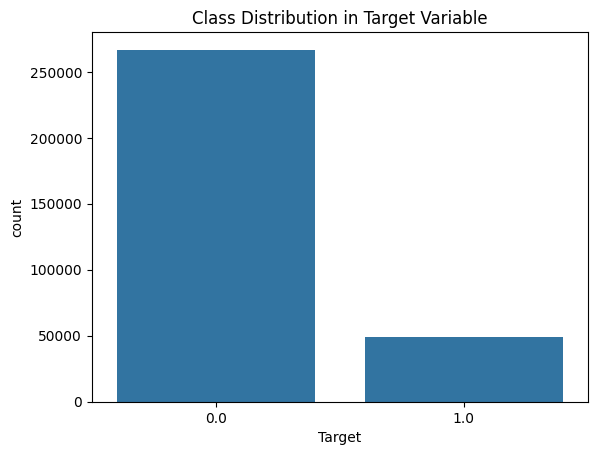

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('combined_water_quality_pipeline_data.csv')  # Replace with your dataset

#Count frequency of each class in the target column
print(df['Target'].value_counts())

sns.countplot(x='Target', data=df)
plt.title("Class Distribution in Target Variable")
plt.show()

# Balance out the dataset using SMOTE

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter


df = pd.read_csv('combined_water_quality_pipeline_data.csv')

if 'City' in df.columns:
    df.drop(columns=['City'], inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = pd.factorize(df[col])[0]

df.fillna(df.mean(), inplace=True)

X = df.drop(columns=['Target'])
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

print("Before SMOTE:", Counter(y_train))

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0: 388853, 1: 168514})
After SMOTE: Counter({0: 388853, 1: 388853})


# SMOTE with KNN Clustering

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

df = pd.read_csv("combined_water_quality_pipeline_data.csv")

selected_columns = [
    "pH", "Iron", "Nitrate", "Lead", "Zinc", "Color", "Turbidity", "Fluoride", "Odor", "Sulfate",
    "Chlorine", "Manganese", "Total Dissolved Solids", "Source", "Water Temperature",
    "Air Temperature", "Pipeline_Age", "Pipeline_Material", "Target"
]
df = df[selected_columns]

X = df.drop("Target", axis=1)
y = df["Target"]

num_cols = X.select_dtypes(include=[np.number]).columns
X[num_cols] = SimpleImputer(strategy='mean').fit_transform(X[num_cols])

cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col] = X[col].fillna(X[col].mode()[0])
    X[col] = LabelEncoder().fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
selector = SelectFromModel(rf, prefit=True)
X_selected = selector.transform(X_scaled)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("✅ Precision:", round(precision_score(y_test, y_pred), 4))
print("✅ Recall:", round(recall_score(y_test, y_pred), 4))
print("✅ F1 Score:", round(f1_score(y_test, y_pred), 4))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87    111101
           1       0.84      0.91      0.88    111101

    accuracy                           0.87    222202
   macro avg       0.87      0.87      0.87    222202
weighted avg       0.87      0.87      0.87    222202

✅ Accuracy: 0.871
✅ Precision: 0.8417
✅ Recall: 0.914
✅ F1 Score: 0.8763
🧾 Confusion Matrix:
 [[ 91999  19102]
 [  9554 101547]]


# RandomForestClassifier for feature selection, KNN with UMAP and SMOTE

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87    111101
           1       0.84      0.91      0.88    111101

    accuracy                           0.87    222202
   macro avg       0.87      0.87      0.87    222202
weighted avg       0.87      0.87      0.87    222202

✅ Accuracy: 0.871
✅ Precision: 0.8417
✅ Recall: 0.914
✅ F1 Score: 0.8763
🧾 Confusion Matrix:
 [[ 91999  19102]
 [  9554 101547]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


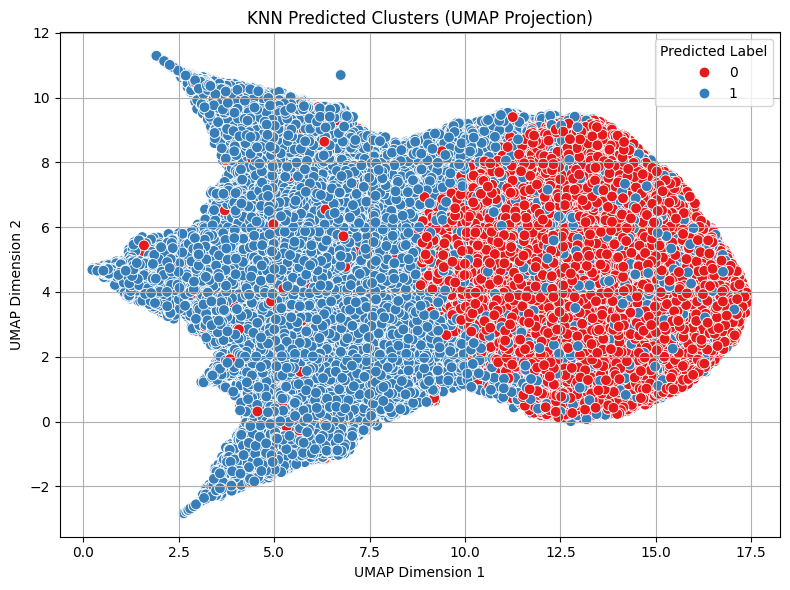

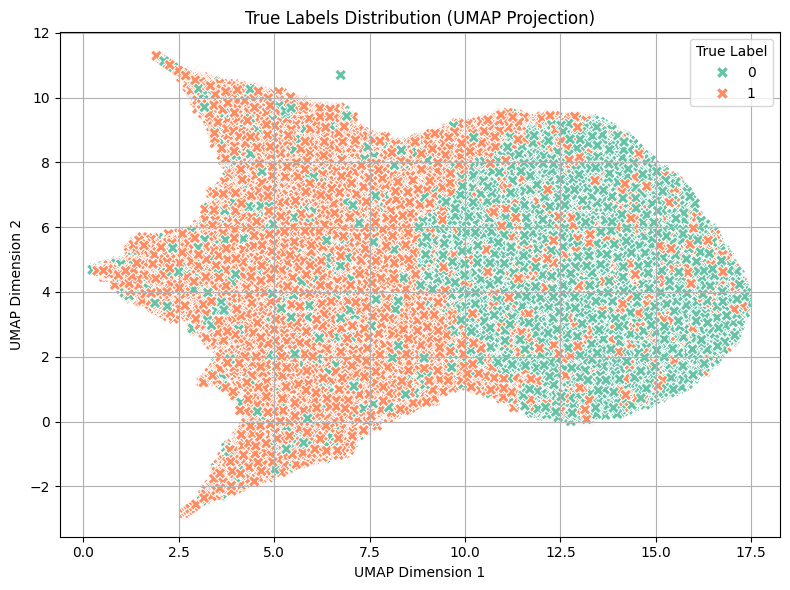

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)
from sklearn.neighbors import KNeighborsClassifier
import umap
from imblearn.over_sampling import SMOTE


df = pd.read_csv("combined_water_quality_pipeline_data.csv")


selected_columns = [
    "pH", "Iron", "Nitrate", "Lead", "Zinc", "Color", "Turbidity", "Fluoride", "Odor", "Sulfate",
    "Chlorine", "Manganese", "Total Dissolved Solids", "Source", "Water Temperature",
    "Air Temperature", "Pipeline_Age", "Pipeline_Material", "Target"
]
df = df[selected_columns]

X = df.drop("Target", axis=1)
y = df["Target"]

num_cols = X.select_dtypes(include=[np.number]).columns
X[num_cols] = SimpleImputer(strategy='mean').fit_transform(X[num_cols])

cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col] = X[col].fillna(X[col].mode()[0])
    X[col] = LabelEncoder().fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
selector = SelectFromModel(rf, prefit=True)
X_selected = selector.transform(X_scaled)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("✅ Precision:", round(precision_score(y_test, y_pred), 4))
print("✅ Recall:", round(recall_score(y_test, y_pred), 4))
print("✅ F1 Score:", round(f1_score(y_test, y_pred), 4))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Visualization: UMAP Scatter Plot
#Reduce test features to 2D using UMAP
reducer = umap.UMAP(random_state=42)
X_test_umap = reducer.fit_transform(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test_umap[:,0], y=X_test_umap[:,1], hue=y_pred, palette='Set1', s=60)
plt.title("KNN Predicted Clusters (UMAP Projection)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Predicted Label")
plt.grid(True)
plt.tight_layout()
plt.show()

#Visualization: True Labels vs Predicted (UMAP)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test_umap[:,0], y=X_test_umap[:,1], hue=y_test, palette='Set2', marker="X", s=70)
plt.title("True Labels Distribution (UMAP Projection)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="True Label")
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE


df = pd.read_csv("combined_water_quality_pipeline_data.csv")

selected_columns = [
    "pH", "Iron", "Nitrate", "Lead", "Zinc", "Color", "Turbidity", "Fluoride", "Odor", "Sulfate",
    "Chlorine", "Manganese", "Total Dissolved Solids", "Source", "Water Temperature",
    "Air Temperature", "Pipeline_Age", "Pipeline_Material", "Target"
]
df = df[selected_columns]

X = df.drop("Target", axis=1)
y = df["Target"]


num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=['object']).columns

X[num_cols] = SimpleImputer(strategy='mean').fit_transform(X[num_cols])

for col in cat_cols:
    X[col] = X[col].fillna(X[col].mode()[0])
    X[col] = LabelEncoder().fit_transform(X[col])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("✅ Precision:", round(precision_score(y_test, y_pred), 4))
print("✅ Recall   :", round(recall_score(y_test, y_pred), 4))
print("✅ F1 Score :", round(f1_score(y_test, y_pred), 4))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87    111101
           1       0.85      0.91      0.88    111101

    accuracy                           0.87    222202
   macro avg       0.88      0.87      0.87    222202
weighted avg       0.88      0.87      0.87    222202

✅ Accuracy : 0.8742
✅ Precision: 0.8507
✅ Recall   : 0.9078
✅ F1 Score : 0.8783
🧾 Confusion Matrix:
 [[ 93394  17707]
 [ 10243 100858]]


# LightGBM Algorithm (with SMOTE)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 388853, number of negative: 388853
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.258890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 777706, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


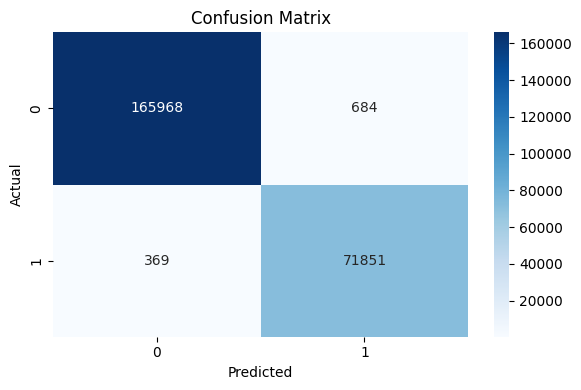

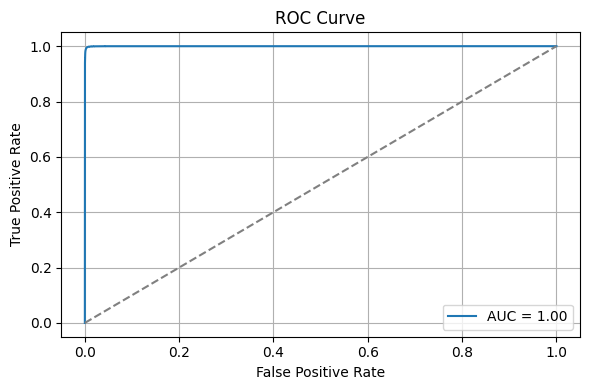


📊 Evaluation Report
Accuracy       : 0.9956
Precision      : 0.9906
Recall         : 0.9949
F1 Score       : 0.9927
ROC AUC Score  : 0.9999

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    166652
         1.0       0.99      0.99      0.99     72220

    accuracy                           1.00    238872
   macro avg       0.99      1.00      0.99    238872
weighted avg       1.00      1.00      1.00    238872



In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('combined_water_quality_pipeline_data.csv')

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'City' in categorical_cols:
    categorical_cols.remove('City')

num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(columns=['Target'])
if 'City' in X.columns:
    X = X.drop(columns=['City'])
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

lgbm_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    random_state=42,
    class_weight='balanced',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=7,
    num_leaves=31
)
lgbm_model.fit(X_train_balanced, y_train_balanced)


y_pred = lgbm_model.predict(X_test)
y_prob = lgbm_model.predict_proba(X_test)[:, 1]


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print("\n Evaluation Report")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"ROC AUC Score  : {auc:.4f}")
print("\nClassification Report:\n", report)


# LightGBM without SMOTE

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 168514, number of negative: 388853
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4688
[LightGBM] [Info] Number of data points in the train set: 557367, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


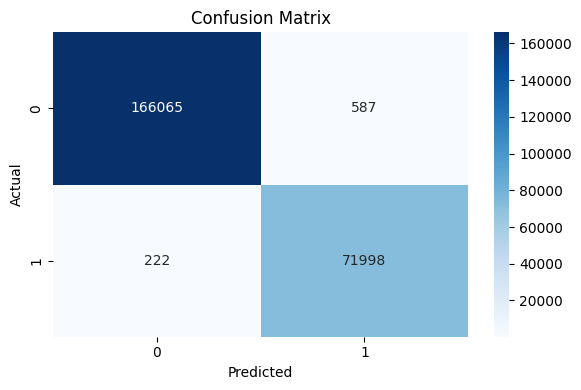

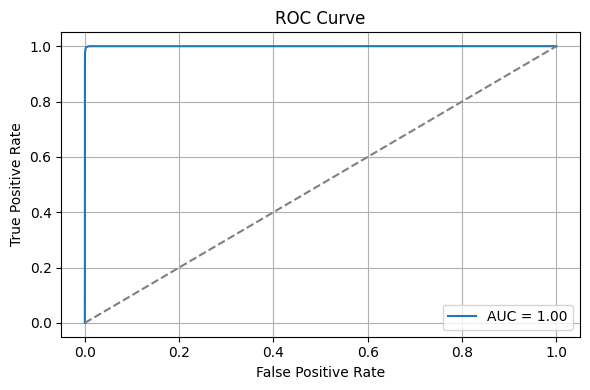


📊 Evaluation Report
Accuracy       : 0.9966
Precision      : 0.9919
Recall         : 0.9969
F1 Score       : 0.9944
ROC AUC Score  : 0.9999

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    166652
         1.0       0.99      1.00      0.99     72220

    accuracy                           1.00    238872
   macro avg       1.00      1.00      1.00    238872
weighted avg       1.00      1.00      1.00    238872



In [2]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('combined_water_quality_pipeline_data.csv')


numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'City' in categorical_cols:
    categorical_cols.remove('City')


num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(columns=['Target'])
if 'City' in X.columns:
    X = X.drop(columns=['City'])
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

#LightGBM Model Training (no SMOTE, but class_weight balanced)
lgbm_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    random_state=42,
    class_weight='balanced',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=7,
    num_leaves=31
)
lgbm_model.fit(X_train, y_train)


y_pred = lgbm_model.predict(X_test)
y_prob = lgbm_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n📊 Evaluation Report")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"ROC AUC Score  : {auc:.4f}")
print("\nClassification Report:\n", report)
